In [1]:
from math import sqrt
import os
import time
from datetime import datetime
import warnings
import time 
import string, random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import seaborn as sns
import tensorflow as tf

warnings.filterwarnings(action='ignore', module='pandas')
warnings.filterwarnings(action='ignore', module='numpy')


In [2]:
from synthesized import HighDimSynthesizer, MetaExtractor
from synthesized.insight.modelling import ModellingPreprocessor


Copyright (C) Synthesized Ltd. - All Rights Reserved
License key: EE6B-6720-67A2-32F3-32F3-2D31-322D-B531
Expires at: 2020-12-31 00:00:00


# Load Data

In [3]:
data = pd.read_csv('/Users/tonbadal/PycharmProjects/synthesized/data/credit_with_categoricals.csv')

data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,effort,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,"(0.00649, 0.04]",9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,"(0.000309, 0.00134]",2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,"(0.000309, 0.00134]",3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,"(0.000309, 0.00134]",3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,"(-0.001, 0.000309]",63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149995,0,0.040674,74,0,"(0.00214, 0.00287]",2100.0,4,0,1,0,0.0
149996,0,0.299745,44,0,"(0.00649, 0.04]",5584.0,4,0,1,0,2.0
149997,0,0.246044,58,0,"(12.67, 3296.64]",NaN,18,0,1,0,0.0
149998,0,0.000000,30,0,"(-0.001, 0.000309]",5716.0,4,0,0,0,0.0


In [4]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(data, test_size=0.2)
target = 'SeriousDlqin2yrs'

# Original Data

In [5]:
from synthesized.insight.metrics.modelling_metrics import classifier_scores_from_df, plot_metrics_from_df

preprocessor = ModellingPreprocessor(target=target, df=data)
preprocessor.fit(data)
df_train_pre = preprocessor.transform(df_train)
df_test_pre = preprocessor.transform(df_test)

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import LinearSVC

classifier = LogisticRegression(max_iter=1000)

In [7]:
clf_orig = clone(classifier)
metrics = ['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']
scores_orig = classifier_scores_from_df(df_train_pre, df_test_pre, target, clf=clf_orig, metrics=None)

for k, v in scores_orig.items():
    print(f"{k} : \t{v:.3f}")

accuracy : 	0.936
precision : 	0.588
recall : 	0.178
f1_score : 	0.274
roc_auc : 	0.838


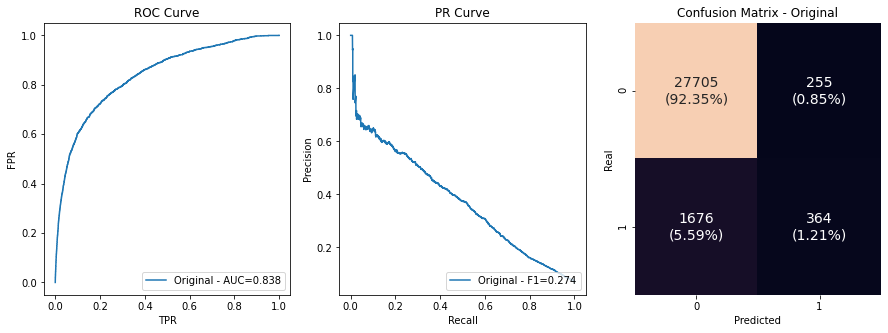

In [8]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
metrics = ['roc_curve', 'pr_curve', 'confusion_matrix']
plot_metrics_from_df(df_train_pre, df_test_pre, target, clf=clf_orig, axes=axs, name="Original")


# Synthesized Data

In [9]:
num_iterations = None

if 'synthesizer' not in locals():
    dp = MetaExtractor.extract(data)
    synthesizer = HighDimSynthesizer(dp)
    synthesizer.__enter__()
    synthesizer.learn(df_train=df_train, num_iterations=num_iterations)
    
df_synth = synthesizer.synthesize(num_rows=len(df_train))


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [10]:
df_synth_pre = preprocessor.transform(df_synth)

clf_synth = clone(classifier)
scores_synth = classifier_scores_from_df(df_synth_pre, df_test_pre, target, clf=clf_synth, metrics=None)
for k, v in scores_synth.items():
    print(f"{k} : \t{v:.3f}")

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 	0.935
precision : 	0.610
recall : 	0.109
f1_score : 	0.185
roc_auc : 	0.824


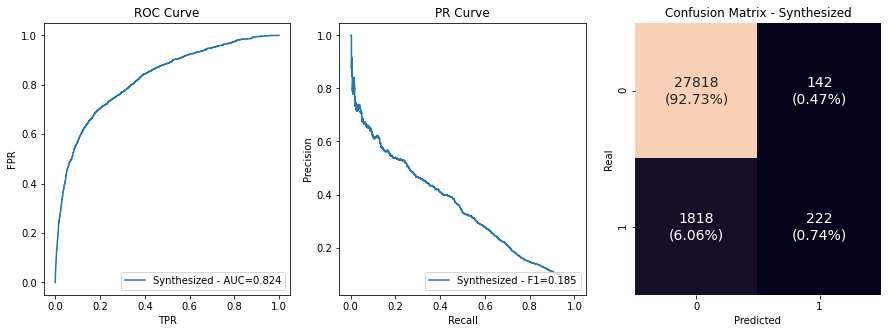

In [11]:
plot_metrics_from_df(df_synth_pre, df_test_pre, target, clf=clf_synth, name="Synthesized")


# Synthesized + Original Data

In [12]:
df_orig_synth = pd.concat((data, df_synth)).sample(frac=1).reset_index(drop=True)


In [13]:
df_orig_synth_pre = preprocessor.transform(df_orig_synth)

clf_orig_synth = clone(classifier)
scores_orig_synth = classifier_scores_from_df(df_orig_synth_pre, df_test_pre, target, clf=clf_orig_synth, metrics=None)

for k, v in scores_orig_synth.items():
    print(f"{k} : \t{v:.3f}")

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 	0.935
precision : 	0.590
recall : 	0.152
f1_score : 	0.242
roc_auc : 	0.835


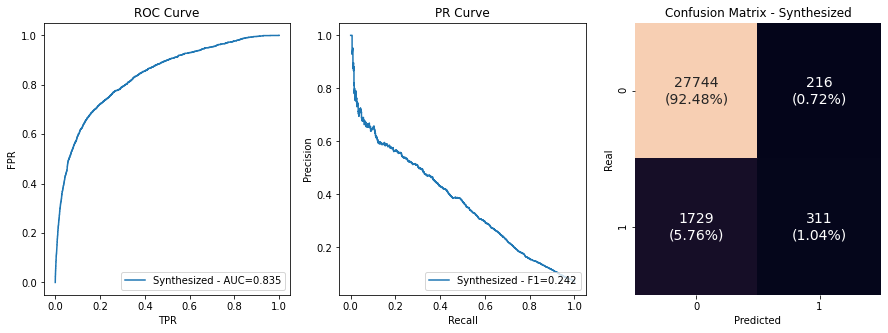

In [14]:
plot_metrics_from_df(df_orig_synth_pre, df_test_pre, target, clf=clf_orig_synth, name="Synthesized")


# Balanced Synthesized

In [15]:
from synthesized.complex import ConditionalSampler

cond = ConditionalSampler(synthesizer)
df_cond = cond.synthesize(num_rows=len(df_test), 
                          explicit_marginals={'SeriousDlqin2yrs': {'0': 0.5, '1': 0.5}})

In [16]:
df_cond_pre = preprocessor.transform(df_cond)

clf_cond = clone(classifier)
scores_cond = classifier_scores_from_df(df_cond_pre, df_test_pre, target, clf=clf_cond, metrics=None)

for k, v in scores_cond.items():
    print(f"{k} : \t{v:.3f}")

/Users/tonbadal/PycharmProjects/synthesized/venv/lib/python3.6/site-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy : 	0.828
precision : 	0.234
recall : 	0.673
f1_score : 	0.347
roc_auc : 	0.826


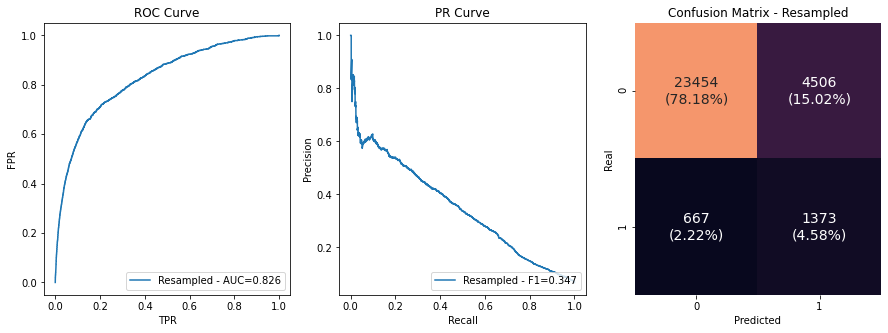

In [17]:
plot_metrics_from_df(df_cond_pre, df_test_pre, target, clf=clf_cond, metrics=metrics, name="Resampled")


# Resampled Original Data

In [18]:
from synthesized.complex import ConditionalSampler

cond = ConditionalSampler(synthesizer)
df_orig_cond = cond.alter_distributions(df=data,
                                        num_rows=2 * len(df_test), 
                                        explicit_marginals={'SeriousDlqin2yrs': {'0': 0.5, '1': 0.5}})

KeyError: ('0',)

In [ ]:
df_orig_cond_pre = preprocessor.transform(df_orig_cond)

clf_orig_cond = clone(classifier)
scores_orig_cond = classifier_scores_from_df(df_orig_cond_pre, df_test_pre, target, clf=clf_orig_cond, metrics=None)

for k, v in scores_orig_cond.items():
    print(f"{k} : \t{v:.3f}")

In [ ]:
metrics = ['roc_curve', 'pr_curve', 'confusion_matrix']
plot_metrics_from_df(df_orig_cond_pre, df_test_pre, target, clf=clf_orig_cond, metrics=metrics, name="Resampled")


# Under-sampled Original Data

In [ ]:
groups = df_train.groupby('SeriousDlqin2yrs').groups

min_group = min([len(g) for g in groups.values()])

df_resamp = df_train.head(0)
for k, idxs in groups.items():
    df_resamp = df_resamp.append(df_train[df_train.index.isin(np.random.choice(idxs, replace=False, size=min_group))])


In [ ]:
df_resamp_pre = preprocessor.transform(df_resamp)

clf_resamp = clone(classifier)
scores_resamp = classifier_scores_from_df(df_resamp_pre, df_test_pre, target, clf=clf_resamp, metrics=None)

for k, v in scores_resamp.items():
    print(f"{k} : \t{v:.3f}")

In [ ]:
metrics = ['roc_curve', 'pr_curve', 'confusion_matrix']
plot_metrics_from_df(df_resamp_pre, df_test_pre, target, clf=clf_resamp, metrics=metrics, name="Resampled")


# Comparision

In [ ]:
df_scores = pd.DataFrame({
    'Original': scores_orig,
    'Synthesized': scores_synth,
    'Data Augmentation': scores_orig_synth,
    'Conditional Sampling': scores_cond,
    'Original Synth-Rebalancing': scores_orig_cond,
    'Under-sampling': scores_resamp
})
df_scores

In [ ]:
clf_orig

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
metrics = ['roc_curve', 'pr_curve']
plot_metrics_from_df(df_train_pre,      df_test_pre, target, clf=clf_orig, metrics=metrics, axes=axs, name="Original")
plot_metrics_from_df(df_synth_pre,      df_test_pre, target, clf=clf_synth, metrics=metrics, axes=axs, name="Synthesized")
plot_metrics_from_df(df_orig_synth_pre, df_test_pre, target, clf=clf_orig_synth, metrics=metrics, axes=axs, name="Data Augmentation")
plot_metrics_from_df(df_cond_pre,       df_test_pre, target, clf=clf_cond, metrics=metrics, axes=axs, name="Resampled")
plot_metrics_from_df(df_orig_cond_pre,  df_test_pre, target, clf=clf_orig_cond, metrics=metrics, axes=axs, name="Original Rebalanced")
plot_metrics_from_df(df_resamp_pre,     df_test_pre, target, clf=clf_resamp, metrics=metrics, axes=axs, name="Original Rebalanced")
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 6, figsize=(24, 4))
metrics = ['confusion_matrix']
plot_metrics_from_df(df_train_pre, df_test_pre, target,      clf=clf_orig, metrics=metrics, axes=axs[0], name="Original")
plot_metrics_from_df(df_synth_pre, df_test_pre, target,      clf=clf_synth, metrics=metrics, axes=axs[1], name="Synthesized")
plot_metrics_from_df(df_orig_synth_pre, df_test_pre, target, clf=clf_orig_synth, metrics=metrics, axes=axs[2], name="Data Augmentation")
plot_metrics_from_df(df_cond_pre, df_test_pre, target,       clf=clf_cond, metrics=metrics, axes=axs[3], name="Resampled")
plot_metrics_from_df(df_orig_cond_pre, df_test_pre, target,  clf=clf_orig_cond, metrics=metrics, axes=axs[4], name="Original Rebalanced")
plot_metrics_from_df(df_resamp_pre, df_test_pre, target,     clf=clf_resamp, metrics=metrics, axes=axs[5], name="Under-sampled")

plt.show()